In [1]:
import tensorflow as tf
import numpy as np
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_loc = 'drive/MyDrive/Dataset'

In [4]:
import shutil

dataset_local = "dataset"
num_classes=len(os.listdir(dataset_loc))
train = 0.95
val = 0.05

for folder in os.listdir(dataset_loc):
  os.makedirs(dataset_local+"/train/"+folder)
  os.makedirs(dataset_local+"/val/"+folder)

for folder in os.listdir(dataset_loc):
  num_files_in_folder=len(os.listdir(dataset_loc+'/'+folder))
  count=1
  for files in os.listdir(dataset_loc+"/"+folder):
    if count <= int(num_files_in_folder*train):
      shutil.copy(dataset_loc+"/"+folder+"/"+files, dataset_local+"/train/"+folder+"/")
      count=count+1
    else:
      shutil.copy(dataset_loc+"/"+folder+"/"+files, dataset_local+"/val/"+folder+"/")
      count=count+1

In [5]:
import tensorflow.keras.backend as K

K.clear_session()
n_classes = 29
img_width, img_height = 150, 150
train_dir = "dataset/train"
val_dir = "dataset/val"
batch_size = 16

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(directory=train_dir,
                                                target_size=(img_width, img_height),
                                                batch_size=batch_size,
                                                class_mode="categorical")

val_gen = test_datagen.flow_from_directory(directory=val_dir,
          target_size=(img_width, img_height),
          batch_size=batch_size,
          class_mode='categorical')

Found 15135 images belonging to 29 classes.
Found 815 images belonging to 29 classes.


In [7]:
from tensorflow.keras import regularizers

inception = InceptionV3(input_shape=(150,150,3),weights='imagenet', include_top=False)
for i in inception.layers:
  i.trainable=False
x = inception.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dense(512,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

predictions = tf.keras.layers.Dense(29,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

87910968/87910968 [==============================] - 0s 0us/step


In [8]:
model = tf.keras.models.Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [10]:
history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=50)

Epoch 1/50
946/946 [==============================] - 211s 208ms/step - loss: 2.1059 - accuracy: 0.5257 - val_loss: 1.5782 - val_accuracy: 0.6380
Epoch 2/50
946/946 [==============================] - 184s 195ms/step - loss: 1.6044 - accuracy: 0.6375 - val_loss: 1.3341 - val_accuracy: 0.6969
Epoch 3/50
946/946 [==============================] - 184s 194ms/step - loss: 1.4160 - accuracy: 0.6758 - val_loss: 1.1871 - val_accuracy: 0.7288
Epoch 4/50
946/946 [==============================] - 182s 193ms/step - loss: 1.3139 - accuracy: 0.6951 - val_loss: 1.1021 - val_accuracy: 0.7497
Epoch 5/50
946/946 [==============================] - 183s 193ms/step - loss: 1.2267 - accuracy: 0.7156 - val_loss: 1.0506 - val_accuracy: 0.7632
Epoch 6/50
946/946 [==============================] - 184s 194ms/step - loss: 1.1792 - accuracy: 0.7265 - val_loss: 1.0124 - val_accuracy: 0.7791
Epoch 7/50
946/946 [==============================] - 183s 193ms/step - loss: 1.1280 - accuracy: 0.7364 - val_loss: 0.9898 -

In [11]:
model.save('model_trained_29class.h5')

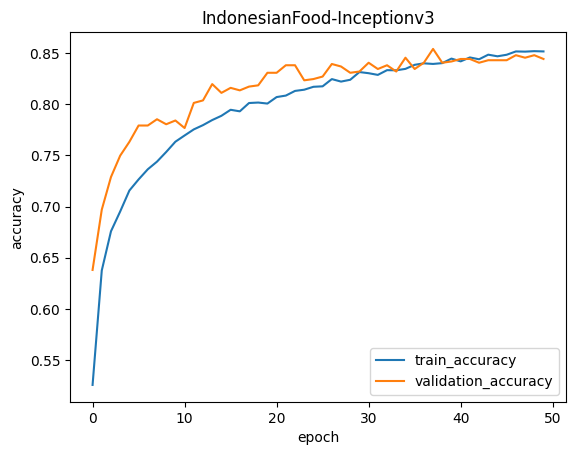

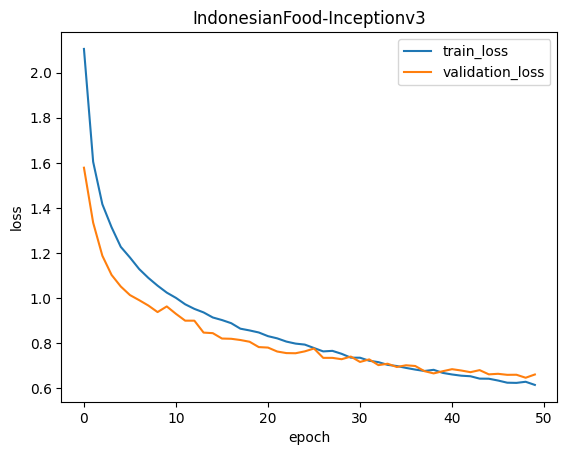

In [12]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()

def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

plot_accuracy(history,'IndonesianFood-Inceptionv3')
plot_loss(history,'IndonesianFood-Inceptionv3')

In [13]:
class_names = train_gen.class_indices

class_names

{'ayam_bakar': 0,
 'ayam_betutu': 1,
 'ayam_goreng': 2,
 'ayam_pop': 3,
 'bakso': 4,
 'bakwan': 5,
 'batagor': 6,
 'beberuk_terong': 7,
 'capcay': 8,
 'coto_makasar': 9,
 'dendeng_batokok': 10,
 'gado_gado': 11,
 'gudeg': 12,
 'gulai_ikan': 13,
 'gulai_tambusu': 14,
 'gulai_tunjang': 15,
 'kerak_telur': 16,
 'kue_dadar_gulung': 17,
 'mie_aceh': 18,
 'nasi_goreng': 19,
 'nasi_kuning': 20,
 'papeda': 21,
 'pempek': 22,
 'peuyeum': 23,
 'rawon': 24,
 'rendang': 25,
 'sate': 26,
 'soto': 27,
 'telur_balado': 28}

In [14]:
from tensorflow.keras.models import load_model
# Loading the best saved model to make predictions
K.clear_session()
model_best = load_model('model_trained_29class.h5',compile = False)

1/1 [==============================] - 0s 47ms/step


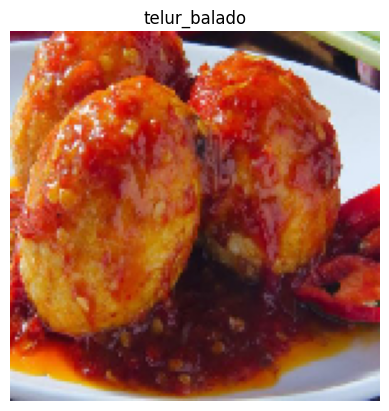

In [21]:
from tensorflow.keras.preprocessing import image

def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(150, 150))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)/255
    pred = model.predict(img)
    index = np.argmax(pred)
    pred=list(class_names.keys())[list(class_names.values()).index(index)]
    if show:
        plt.imshow(img[0])
        plt.axis('off')
        plt.title(pred)
        plt.show()

images = []
images.append('telur_balado].jpg')
predict_class(model_best, images, True)

In [22]:
!tensorflowjs_converter --input_format keras 'model.h5' 'tfjs_model'

/bin/bash: tensorflowjs_converter: command not found


In [23]:
shutil.make_archive('model_js', 'zip', 'tfjs_model')

'/content/model_js.zip'

In [24]:
!tflite_convert \
  --keras_model_file=model.h5 \
  --output_file=mobilenet.tflite

2023-06-14 05:00:50.526949: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/usr/local/bin/tflite_convert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/tflite_convert.py", line 689, in main
    app.run(main=run_main, argv=sys.argv[:1])
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 308, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 254, in _run_main
    sys.exit(main(argv))
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/tflite_convert.py", line 672, in run_main
    _convert_tf2_model(tflite_flags)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/tflite_convert.py", line 278, in _convert_tf2_model
    model = keras_deps.get_load_model_function()(flags.keras_model_file)
  File "/usr/local/lib/python3.10/dist-packa

In [25]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model_new.tflite', 'wb') as f:
  f.write(tflite_model)


In [26]:
!zip -r /content/dataset.zip /content/dataset

Streaming output truncated to the last 5000 lines.
  adding: content/dataset/train/gado_gado/gado gado-20292.jpg (deflated 0%)
  adding: content/dataset/train/gado_gado/gado gado-21105.jpg (deflated 0%)
  adding: content/dataset/train/gado_gado/gado gado-20540.jpg (deflated 5%)
  adding: content/dataset/train/gado_gado/gado gado-21564.jpg (deflated 0%)
  adding: content/dataset/train/gado_gado/gado gado-21354.jpg (deflated 0%)
  adding: content/dataset/train/gado_gado/gado gado (215).jpg (deflated 0%)
  adding: content/dataset/train/gado_gado/gado gado-21012.jpg (deflated 5%)
  adding: content/dataset/train/gado_gado/gado gado-20344.jpg (deflated 0%)
  adding: content/dataset/train/gado_gado/gado gado-20547.jpg (deflated 6%)
  adding: content/dataset/train/gado_gado/gado gado (294).jpg (deflated 1%)
  adding: content/dataset/train/gado_gado/gado gado (23).jpg (deflated 0%)
  adding: content/dataset/train/gado_gado/gado gado-21768.jpg (deflated 5%)
  adding: content/dataset/train/gado_g

In [27]:
from google.colab import files
files.download("/content/dataset.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
files.download("/content/model_trained_29class.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>